In [1]:
%load_ext autoreload

%autoreload 2
import sys
import corner
import numpy as np
import matplotlib.pyplot as plt
import scipy
def binning(corner): return [[corner[i],corner[i+1]] for i in range(len(corner)-1)]
sys.path.append('/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/modules/')
import covariance as covar
import utils
import pandas as pd
import abundance as cl_count
import forecast
import emcee
from lnlikelihood import lnLikelihood
import pyccl as ccl
import edit, sys
import h5py, glob
Omega_c_true = 0.30711 - 0.048254
Omega_b_true = 0.048254
sigma8_true = .8288
Omegam_true = 0.30711
True_value = [Omega_c_true + Omega_b_true, sigma8_true]

/pbs/home/c/cpayerne/.conda/envs/myenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import analysis

In [3]:
def load_pickle(filename, **kwargs):
    with open(filename, 'rb') as fin:
        return pickle.load(fin, **kwargs)

In [4]:
sys.path.append('/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/notebooks/Unbinned_likelihood_with_SSC')
import analysis

In [108]:
file_binned = ['Om_SSC_contribution_binned_approx_5zx5m_z[0.20,1.00]_logm[15.00,15.60]_fsky[0.2500].pkl',
              'Om_SSC_contribution_binned_approx_10zx10m_z[0.20,1.00]_logm[15.00,15.60]_fsky[0.2500].pkl',
              'Om_SSC_contribution_binned_approx_70zx70m_z[0.20,1.00]_logm[15.00,15.60]_fsky[0.2500].pkl',
              'Om_SSC_contribution_binned_approx_100zx100m_z[0.20,1.00]_logm[15.00,15.60]_fsky[0.2500].pkl']
file_unbinned = ['Om_SSC_contribution__unbinned_z[0.20,1.00]_logm[15.00,15.60]_fsky[0.2500].pkl']

In [90]:
file_binned = ['Om_SSC_contribution_binned_approx_5zx5m_z[0.20,1.00]_logm[14.90,15.60]_fsky[0.2500].pkl',
              'Om_SSC_contribution_binned_approx_10zx10m_z[0.20,1.00]_logm[14.90,15.60]_fsky[0.2500].pkl',
              'Om_SSC_contribution_binned_approx_70zx70m_z[0.20,1.00]_logm[14.90,15.60]_fsky[0.2500].pkl',
              'Om_SSC_contribution_binned_approx_100zx100m_z[0.20,1.00]_logm[14.90,15.60]_fsky[0.2500].pkl']
file_unbinned = ['Om_SSC_contribution__unbinned_z[0.20,1.00]_logm[14.90,15.60]_fsky[0.2500].pkl']

In [148]:
file_binned = ['Om_SSC_contribution_binned_approx_5zx5m_z[0.20,0.50]_logm[14.40,15.60]_fsky[0.1000].pkl',
              'Om_SSC_contribution_binned_approx_10zx10m_z[0.20,0.50]_logm[14.40,15.60]_fsky[0.1000].pkl',
              'Om_SSC_contribution_binned_approx_70zx70m_z[0.20,0.50]_logm[14.40,15.60]_fsky[0.1000].pkl',
              'Om_SSC_contribution_binned_approx_100zx100m_z[0.20,0.50]_logm[14.40,15.60]_fsky[0.1000].pkl']
file_unbinned = ['Om_SSC_contribution__unbinned_z[0.20,0.50]_logm[14.40,15.60]_fsky[0.1000].pkl']

In [149]:
#file_unbinned = ['Om_SSC_contribution_14.20_15.60_fsky=0.2500.pkl']

In [150]:
name_file_binned = file_binned#[str(analysis.analysisbinned[i]['nzbins'])+'z-'+str(analysis.analysisbinned[i]['nmbins'])+'m' for i in range(len(file_binned))]

In [151]:
name_file_binned

['Om_SSC_contribution_binned_approx_5zx5m_z[0.20,0.50]_logm[14.40,15.60]_fsky[0.1000].pkl',
 'Om_SSC_contribution_binned_approx_10zx10m_z[0.20,0.50]_logm[14.40,15.60]_fsky[0.1000].pkl',
 'Om_SSC_contribution_binned_approx_70zx70m_z[0.20,0.50]_logm[14.40,15.60]_fsky[0.1000].pkl',
 'Om_SSC_contribution_binned_approx_100zx100m_z[0.20,0.50]_logm[14.40,15.60]_fsky[0.1000].pkl']

In [152]:
 d = '/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/notebooks/Unbinned_likelihood_with_SSC/SSC_contribution/SSC/'

In [153]:
ssc_contOmbinned = []
sn_contOmbinned = []
for f in file_binned:
    Om, y = np.load(d + f, allow_pickle=True)
    ssc_contOmbinned.append(np.array([y[i][2] for i in range(len(Om))]))
    sn_contOmbinned.append(np.array([y[i][1] for i in range(len(Om))]))

FileNotFoundError: [Errno 2] No such file or directory: '/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/notebooks/Unbinned_likelihood_with_SSC/SSC_contribution/SSC/Om_SSC_contribution_binned_approx_5zx5m_z[0.20,0.50]_logm[14.40,15.60]_fsky[0.1000].pkl'

In [154]:
Omunbinned, y = np.load(d + file_unbinned[0], allow_pickle=True)
ssc_contOmunbinned = [y[i][2] for i in range(len(Omunbinned))]
sn_contOmunbinned = [y[i][1] for i in range(len(Om))]

0.29595 0.00303

0.29629 0.00358

0.8449782816916955


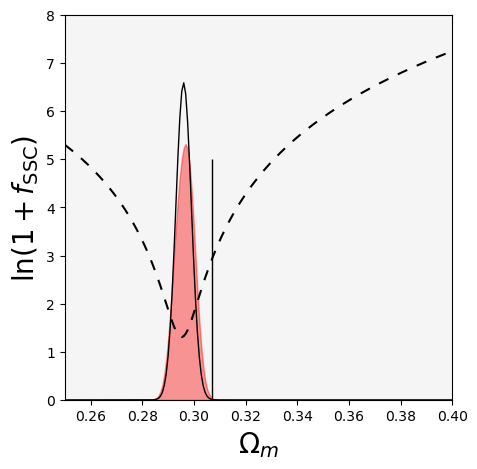

In [155]:
plt.figure(figsize = (5,5))
ax = plt.axes()
ax.set_facecolor("whitesmoke")
dOm = Om[1]-Om[0]

#for i, f in enumerate(file_binned):
 #   plt.plot(Om,ssc_contOmbinned[i]+1, lw=2, label = name_file_binned[i])
plt.plot(Omunbinned, np.array(ssc_contOmunbinned)+1, ls=(0, (5, 5)) ,c='k', label = 'unbinned SSC', zorder=100)
plt.xlabel(r'$\Omega_m$', fontsize=20)
plt.ylabel(r'$\ln(1 + f_{\rm SSC})$', fontsize=20)
plt.ylim(0., 8)
plt.xlim(0.25, 0.4)
plt.vlines(0.30711, -3, 5, zorder=0, color='k', lw=1)

y = [ sn_contOmunbinned, ]# sn_contOmbinned[0]]
yssc = [ssc_contOmunbinned,]# ssc_contOmbinned[0]]
x = [Omunbinned, Om]

for i, y_ in enumerate(y):
    
    
    #Poisson likelihood
    y_post1 = np.exp(y_ - np.max(y_))
    y_ = y_post1/np.trapz(y_post1, x[i])
    xmean = np.trapz(y_*x[i],x[i])
    sigma2SN = np.trapz(y_*(x[i] - xmean)**2,x[i])
    print(f'{xmean:.5f} {sigma2SN**.5:.5f}')
    plt.plot(x[i], .05*y_, ls='-' ,c='k',lw=1)
    print( )
    #
    y_post2 = y_ * np.exp(yssc[i])
    y_ = y_post2/np.trapz(y_post2, x[i])
    xmean = np.trapz(y_*x[i],x[i])
    sigma2SSC = np.trapz(y_*(x[i] - xmean)**2,x[i])
    print(f'{xmean:.5f} {sigma2SSC**.5:.5f}')
    #
    print()
    print((sigma2SN**.5)/(sigma2SSC**.5))
    plt.fill_between(x[i], .05*y_, 0*( .03*y_), alpha=.4, color = 'r', edgecolor='r')
    
    #y = np.exp(-(xmean-x[i])**2/(2*sigma2SSC))
    
    #plt.plot(x[i], .05*y/np.trapz(y, x[i]))
    #break
#plt.legend(frameon=True, fontsize=11, framealpha=1, facecolor='white', loc= 'upper right')
#plt.vlines(0.30711, 0, 10**7)
#plt.savefig('ssc2.pdf', bbox_inches='tight', dpi=300)

In [ ]:
np.log10(8*10**14)

14.903089986991944

In [17]:
from scipy.interpolate import interp1d

In [18]:
to_derive = [ssc_contOmunbinned]
#to_derive = y
x_to_derive =[Omunbinned]

-27051.41386822417


(0.2, 0.4)

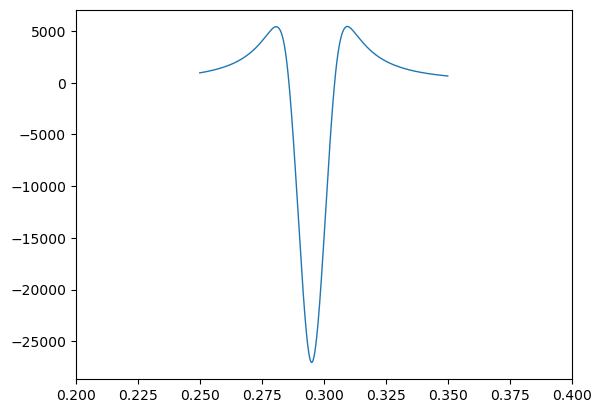

In [19]:
color = ['C0', 'C1', 'C2', 'C3', 'k']
Om_axis = np.linspace(0.25, 0.35, 1000)
for i in range(1):
    lnf = to_derive[i]
    x = x_to_derive[i]
    interp = interp1d(x, lnf, kind='cubic')
    def first_deriv(x):
        h = 0.001
        return (interp(x+h) - interp(x))/(h)
    def second_deriv(x):
        h = 0.01
        return (interp(x+h)-2*interp(x)+interp(x-h))/(h**2)
    dd = [second_deriv(x) for x in Om_axis]
    d = [first_deriv(x) for x in Om_axis]
    plt.plot(Om_axis, -np.array(dd), color = color[i], lw=1)
    print(np.min(-np.array(dd)))
plt.xlim(0.2, 0.4)